In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from pprint import pprint

In [27]:
from tqdm import tqdm

# Break Down Reviews into Sentences

In [5]:
import nltk.data

In [9]:
nltk.download('punkt', download_dir='data/')

[nltk_data] Downloading package punkt to data/...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
raw_data = pd.read_csv('data/tripadvisor_100k_poi_reviews.csv', index_col=0)

In [4]:
raw_data.head()

,userreview_id,TAPOILocationId,TAPOILocationName,TAGeoId,TAGeoName,review_cnt,bubble_rating,num_thumb_ups,title,reviewtext
0,38412456,104365,Empire State Building,60763,New York City,76157,3,155,"86th floor worth it, 102nd not",We arrived at sunset and pretty much moved thr...
1,660950745,104365,Empire State Building,60763,New York City,76157,4,86,No more a King Kong favourite,The construction of the Empire State Building ...
2,611308372,104365,Empire State Building,60763,New York City,76157,5,62,Great view,This is a great way to see all of New York fro...
3,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,4 things you must do when you visit this build...
4,18606584,104365,Empire State Building,60763,New York City,76157,5,47,"Empire State Building Express Pass, Worth EVER...","If skipping ALL lines including security, stan..."


In [10]:
tokenizer = nltk.data.load('data/tokenizers/punkt/english.pickle')

__Note:__

We observed that the symbol '|' is prevalent in the raw review text and would confuse our tokenizer. Therefore, we replace every '|' with ' .' so that it can be picked up by the tokenizer as a sentence delimiter.

In [40]:
# Write a parser

def parse(text, tokenizer):
    # Replace '|' with a white space
    temp = text.replace('|', ' .')
    # Tokenize
    temp = tokenizer.tokenize(temp)
    return temp

In [41]:
sentences_series = raw_data.reviewtext.apply(lambda x: parse(x, tokenizer))

In [42]:
index_list = []
sentences = []

for index, value in tqdm(sentences_series.items()):
    for sent in value:
        index_list.append(index)
        sentences.append(sent)

temp_df = pd.DataFrame({'sentence': sentences, 'original_index': index_list})

100000it [00:00, 268402.47it/s]


In [43]:
combinedDF = temp_df.merge(raw_data, left_on='original_index', right_index=True).drop(columns=['reviewtext', 'original_index'])

In [45]:
combinedDF.shape

(1027832, 10)

## Further cleaning

In [33]:
from gensim.utils import simple_tokenize

In [34]:
# Test
list(simple_tokenize('I had a very good meal today.'))

['I', 'had', 'a', 'very', 'good', 'meal', 'today']

In [46]:
# Get length of each sentence
doc_length_arr = combinedDF.sentence.apply(lambda x: len(list(simple_tokenize(x))))

In [47]:
doc_length_arr.sort_values(ascending=False)

516026     498
662205     480
345910     472
583657     467
350994     428
834683     420
369795     391
254425     365
904508     362
1014172    357
1010906    356
57814      325
811314     319
974246     317
524735     314
904566     298
974137     289
882873     287
722769     283
675078     278
461076     276
813025     272
908980     264
512120     260
7850       260
458146     259
1011759    258
614359     252
426471     251
638861     251
          ... 
356186       0
816797       0
356187       0
356188       0
608438       0
178212       0
178211       0
178210       0
356190       0
178208       0
178207       0
178206       0
816775       0
178204       0
178203       0
178202       0
356191       0
178200       0
178199       0
178198       0
356192       0
178196       0
178195       0
178194       0
816787       0
608415       0
608410       0
608409       0
816796       0
513915       0
Name: sentence, Length: 1027832, dtype: int64

In [53]:
combinedDF['sentence_length'] = doc_length_arr

In [54]:
combinedDF.loc[combinedDF.sentence_length == 0]

,sentence,userreview_id,TAPOILocationId,TAPOILocationName,TAGeoId,TAGeoName,review_cnt,bubble_rating,num_thumb_ups,title,sentence_length
3,.,38412456,104365,Empire State Building,60763,New York City,76157,3,155,"86th floor worth it, 102nd not",0
4,.,38412456,104365,Empire State Building,60763,New York City,76157,3,155,"86th floor worth it, 102nd not",0
5,.,38412456,104365,Empire State Building,60763,New York City,76157,3,155,"86th floor worth it, 102nd not",0
21,.1.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
23,.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
24,.2.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
26,.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
27,.3.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
30,.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0
31,.4.,4583693,104365,Empire State Building,60763,New York City,76157,5,54,NYC Views,0


In [61]:
combinedDF.loc[combinedDF.sentence_length == 1]

,sentence,userreview_id,TAPOILocationId,TAPOILocationName,TAGeoId,TAGeoName,review_cnt,bubble_rating,num_thumb_ups,title,sentence_length
102,Ok.,134397554,104365,Empire State Building,60763,New York City,76157,2,29,4th of July Disappointment,1
161,Yes!,4298973,104365,Empire State Building,60763,New York City,76157,5,22,This skeptic is now a believer.,1
327,wet.,4319158,104365,Empire State Building,60763,New York City,76157,3,15,we went on a rainy day...,1
468,drywall.,3930711,104365,Empire State Building,60763,New York City,76157,1,14,Tallest tourist trap in New York City,1
860,Robbers !,5292308,104365,Empire State Building,60763,New York City,76157,5,11,Fantastic,1
977,Infuriating.,129600687,104365,Empire State Building,60763,New York City,76157,1,10,Spectacular views that you'll be too hacked of...,1
1005,Simple!,129600687,104365,Empire State Building,60763,New York City,76157,1,10,Spectacular views that you'll be too hacked of...,1
1036,Lifts?,129600687,104365,Empire State Building,60763,New York City,76157,1,10,Spectacular views that you'll be too hacked of...,1
1037,No.,129600687,104365,Empire State Building,60763,New York City,76157,1,10,Spectacular views that you'll be too hacked of...,1
1046,Lifts?,129600687,104365,Empire State Building,60763,New York City,76157,1,10,Spectacular views that you'll be too hacked of...,1


In [63]:
combinedDF.loc[combinedDF.userreview_id == 129600687, 'sentence']

920                                  The short version: .
921                                                     .
922                                                     .
923     .Overrated, poorly managed, the staff are rude...
924     If you want to enjoy your visit, you’ll have t...
925     Don’t bother with the $23 ticket because by th...
926            The views are amazing, that is undisputed.
927     But that's about all this place has going for ...
928                          Try Top of the Rock instead.
929                                                     .
930                                                     .
931                                                     .
932                                                     .
933                                                     .
934     .And now the long version - I'll walk you thro...
935                                                     .
936                                                     .
937     .8.25p

In [62]:
raw_data.loc[raw_data.userreview_id == 129600687, 'reviewtext'].values

array(['The short version:||||Overrated, poorly managed, the staff are rude and it isn\'t worth the queues. If you want to enjoy your visit, you’ll have to pay $47 each for an express pass, if you think it’s worth it. Don’t bother with the $23 ticket because by the time you get there you’ll be too tired and annoyed to take any pleasure from the view. The views are amazing, that is undisputed. But that\'s about all this place has going for it, and there are plenty of other places to go for a stunning view of New York City. Try Top of the Rock instead.||||||And now the long version - I\'ll walk you through our experience:||||8.25pm: Arrive, cheerful and hoping for grand finale to our awesome weekend in NYC. Had great experience at Top of the Rock earlier in the day and want to see NYC skyline by night. Prepared for a long queue, although think that as it\'s getting late, a lot of the families and tour groups will have visited during the day, and it\'ll be comparatively quiet.||||8.30pm: 

Let's check whether our tokenizer properly addressed the '|' symbols and broke down the text body into sentences as expected.

In [59]:
raw_data.loc[raw_data.userreview_id == 4583693, 'reviewtext'].values

array(['4 things you must do when you visit this building:||1. Buy your ticket before you travel - you can buy them online at www.esbnyc.com - this will save you a good hour as you wont have to queue in the building to buy your ticket.||2. Early morning - try and make it an early port of call as the queues for the lift can be very long if you go around lunch time.||3. Night viewing - If you dont fancy an early morning visit. go up later on at night - its open till after 11 and the view of the city at night is something else!||4. Take gloves - especially if its not summer as it can be very windy and cold up there||All in all - this is probably one of the most famous landmakrs in the city and its worht the trip up to the 86th floor to take in the sprawling mass of skyscrapers and look down to see little yellow dots as the taxis go about their business.||I have been to NY twice and each time I went to visit the ESB twice - once in daylight and once at night time. Personally I think the ni

In [60]:
combinedDF.loc[combinedDF.userreview_id == 4583693, 'sentence']

20    4 things you must do when you visit this build...
21                                                  .1.
22    Buy your ticket before you travel - you can bu...
23                                                    .
24                                                  .2.
25    Early morning - try and make it an early port ...
26                                                    .
27                                                  .3.
28    Night viewing - If you dont fancy an early mor...
29    go up later on at night - its open till after ...
30                                                    .
31                                                  .4.
32    Take gloves - especially if its not summer as ...
33    .All in all - this is probably one of the most...
34                                                    .
35    .I have been to NY twice and each time I went ...
36    Personally I think the night time is more magi...
37                                              

Seems like it worked.

Still, a handful of the reviews were not properly partitioned, like the following.

In [50]:
combinedDF.loc[345910, 'sentence']

'I went for 5 nights to Times Square, we arrived at night at LGA got a NYC Taxi to Times Square total cost $40 plus tip, the next day went to get NY Pass cards that I bought thru internet is cheaper, no line to get it if you go early before 8 am, then we got the Subway to Statue Of Liberty (included with pass), we arrived at 9 am make a small line to get the tickets with the NY Pass (the waiting was fast) then go to make the line for the ferry, they open at 9:30 am, then we went to the Liberty Island, every 25 minutes the ferry leaves to Ellis Island, if not you can wait for the other one to take you to Ellis Island, stay there for about another 25 min or wait for the other one, (always make sure to take to ferry to NY not Jersey, then we arrived to NY and went walking for about 10 minutes to 911 Memorial, then we went in, got our tickets (THIS IS A DONATION), then after that it will take you about 30 minutes, then after we got the subway again to Rockerfeller Center/ Top of the Rock(a

Observe that a small proportion of the rows have a short sentence length. Such sentences would not be awfully helpful. Hence, we will drop rows with a sentence length < 3. 

In [65]:
cleanedDF = combinedDF.loc[combinedDF.sentence_length >= 3]

In [66]:
cleanedDF.shape

(773129, 11)

In [69]:
cleanedDF.sort_values(by='sentence_length', ascending=False)

,sentence,userreview_id,TAPOILocationId,TAPOILocationName,TAGeoId,TAGeoName,review_cnt,bubble_rating,num_thumb_ups,title,sentence_length
516026,We really struggled with planning to do either...,554291960,104417,Universal Studios Hollywood,32655,Los Angeles,25823,5,4,1 day Family fun at Universal,498
662205,"The main paths lead Further into the park, and...",56765015,102814,Disney's Animal Kingdom,34515,Orlando,23614,5,6,Fantastic day out,480
345910,"I went for 5 nights to Times Square, we arrive...",198843972,110145,Times Square,60763,New York City,32305,5,2,New York Pass Family Trip,472
583657,the majority of the people workin in the casin...,231293575,126583,The Strip,45963,Las Vegas,24177,1,9,the best of Las Vegas is gone forever,467
350994,We decided to spend a couple of days in Prague...,640544059,275157,Charles Bridge,274707,Prague,32266,5,1,Be aware of homeless people,428
834683,And when my husband told the security that som...,274639161,102412,SeaWorld,34515,Orlando,21844,1,13,Bad Incident inside Seworld,420
369795,We went this Sunday to Winter wanderland in Le...,245505082,207144,LEGOLAND Windsor Resort,186419,Windsor,31630,1,14,"my son now doesn't belive in Santa,thanks to l...",391
254425,arriving at Edinburgh castle a mum with 2 chi...,3880522,187653,Edinburgh Castle,186525,Edinburgh,35557,5,23,queen of the castle,365
904508,"Well finding the entrance is a surprise, just ...",320459498,195569,Warwick Castle,186400,Warwick,20929,3,5,Nice but no good out of season,362
1014172,We got tickets at travelrepublic before our ho...,605945235,668504,Siam Park,315919,Adeje,19897,5,2,Siam and Loro Premium twin ticket,357


### Save the cleaned parsed dataframe

In [70]:
cleanedDF.to_csv('data/cleaned_reviews_df.csv', index=False)

# Summary Statistics

## Histogram of Sentence Length

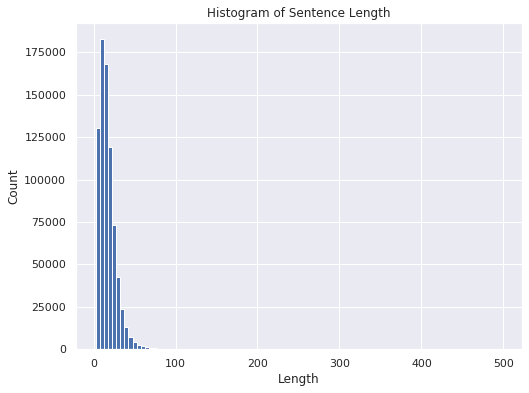

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
cleanedDF.sentence_length.hist(bins=100, ax=ax)
ax.set_title('Histogram of Sentence Length')
ax.set_xlabel('Length')
ax.set_ylabel('Count')
plt.show()

# Train-Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
data = pd.read_csv('data/cleaned_reviews_df.csv')

In [78]:
dummy_y = np.zeros(data.shape[0])
data_train, data_test, _, _ = train_test_split(data, dummy_y, test_size=0.01, random_state=2019)

In [81]:
data.shape

(773129, 11)

In [79]:
data_train.shape

(765397, 11)

In [80]:
data_test.shape

(7732, 11)

In [83]:
# Save the training & test sets
data_train.to_csv('data/review_sentence_parsed_train.csv', index=False)
data_test.to_csv('data/review_sentence_parsed_test.csv', index=False)